In [ ]:
! pip install sweetviz

In [ ]:
! pip install seaborn

Importing needed Libraries

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns  

In [70]:
df = pd.read_csv('newdata.csv', index_col=[0])
df.index.name = 'id'
df.head()
y = df['smoking']
x = df.drop('smoking', axis=1)

In [ ]:
df.drop('smoking' , axis =1 ,  inplace= True)
cat, numerical = [], []
for col in df.columns:
    if df[col].nunique() > 10:
        numerical.append(col)
    else:
        cat.append(col)

BEFORE REMOVING OUTLIERS

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


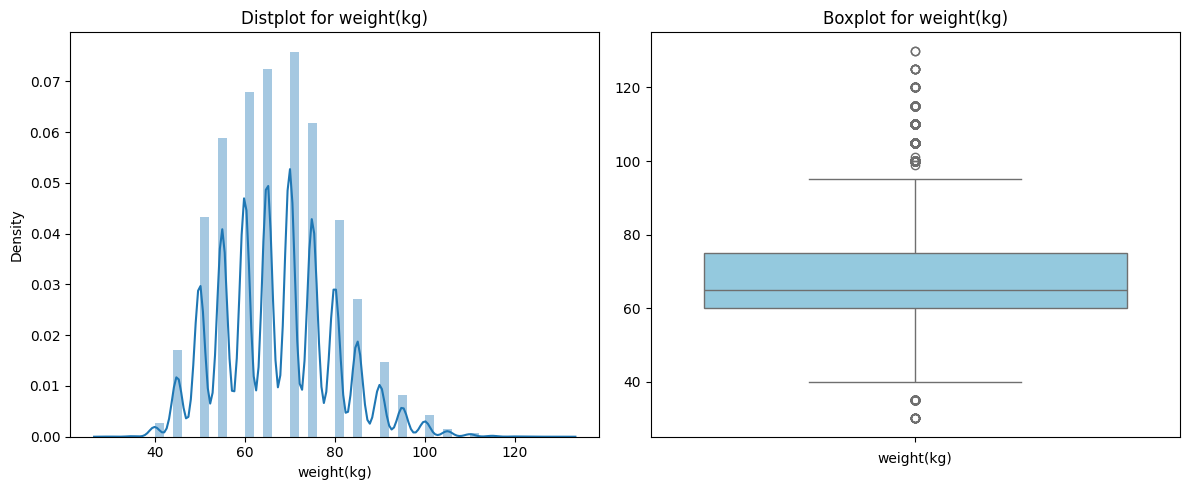

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


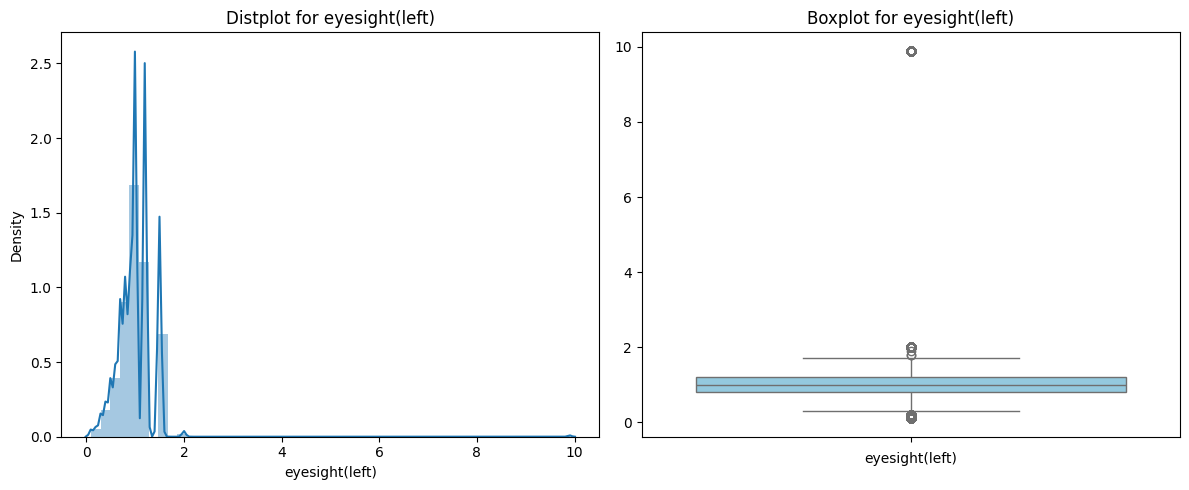

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


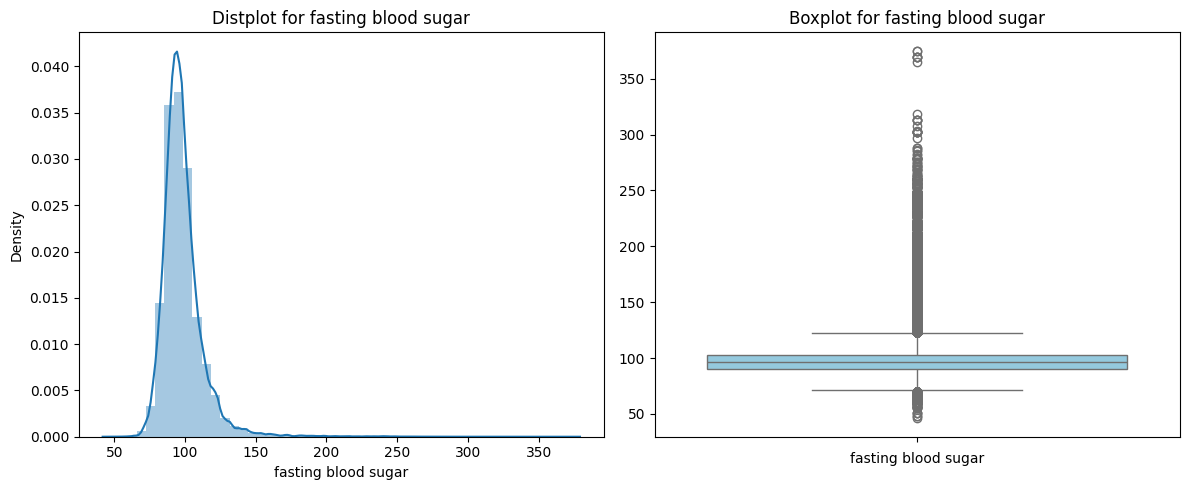

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


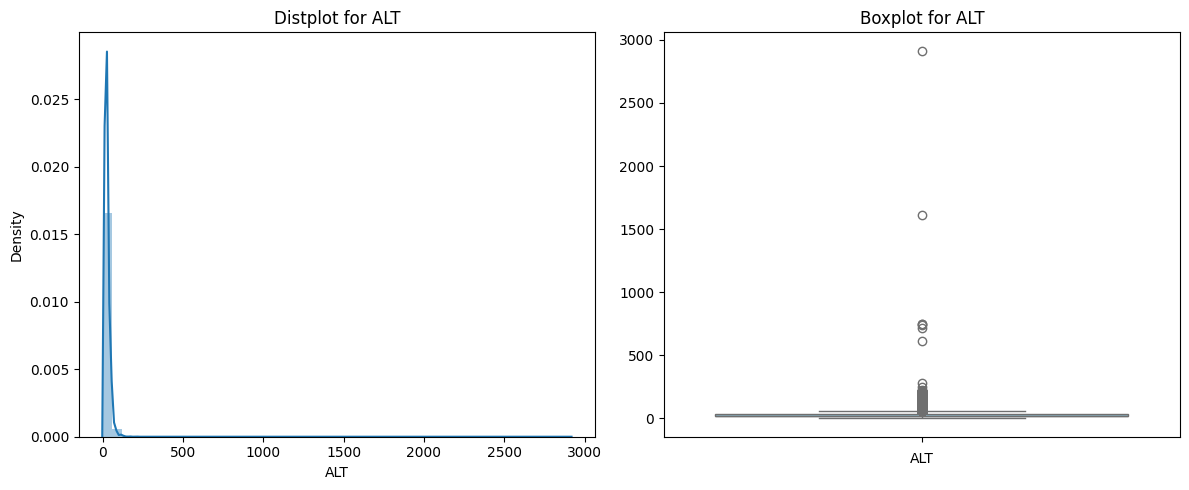

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


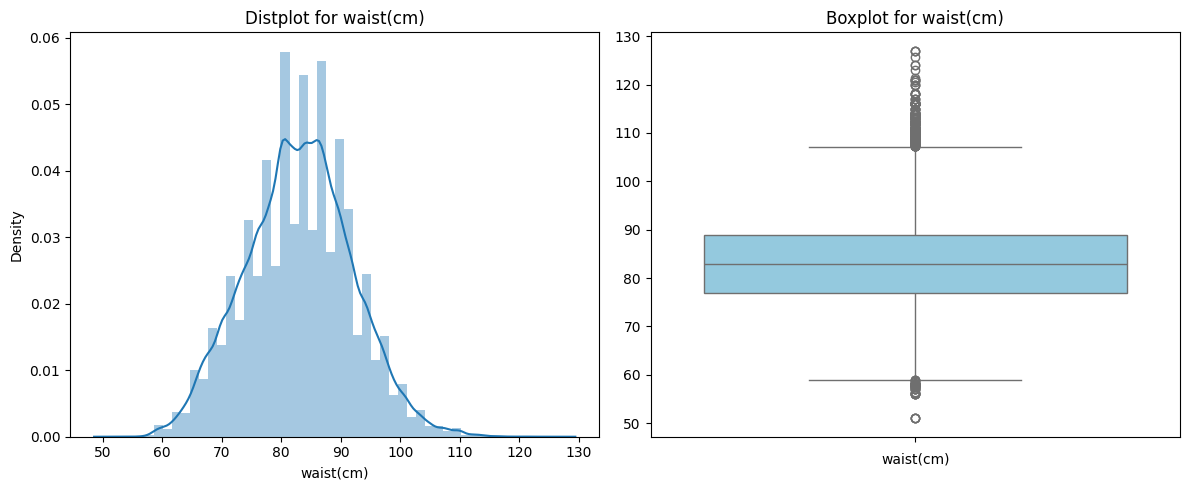

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


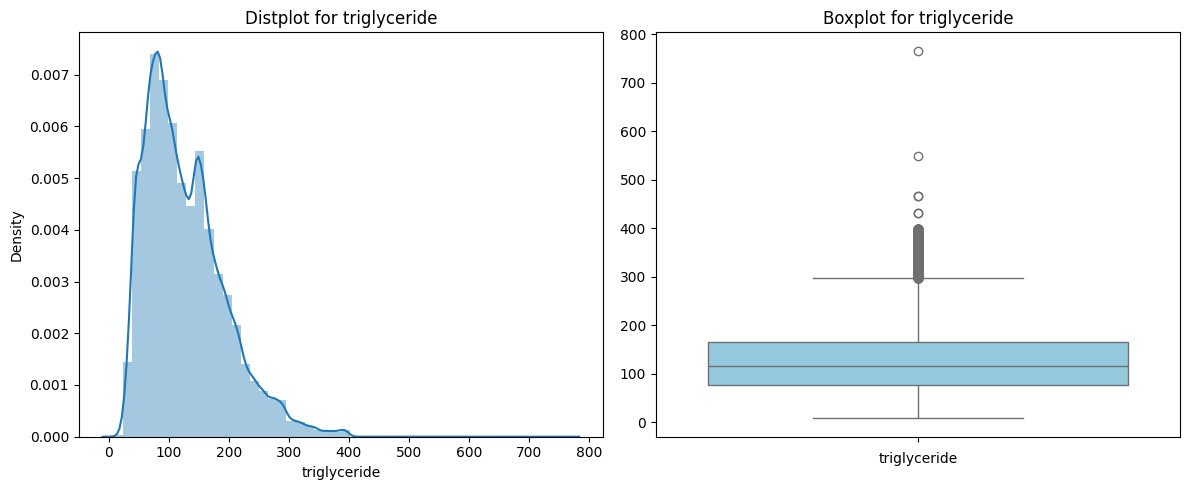

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3357982435.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


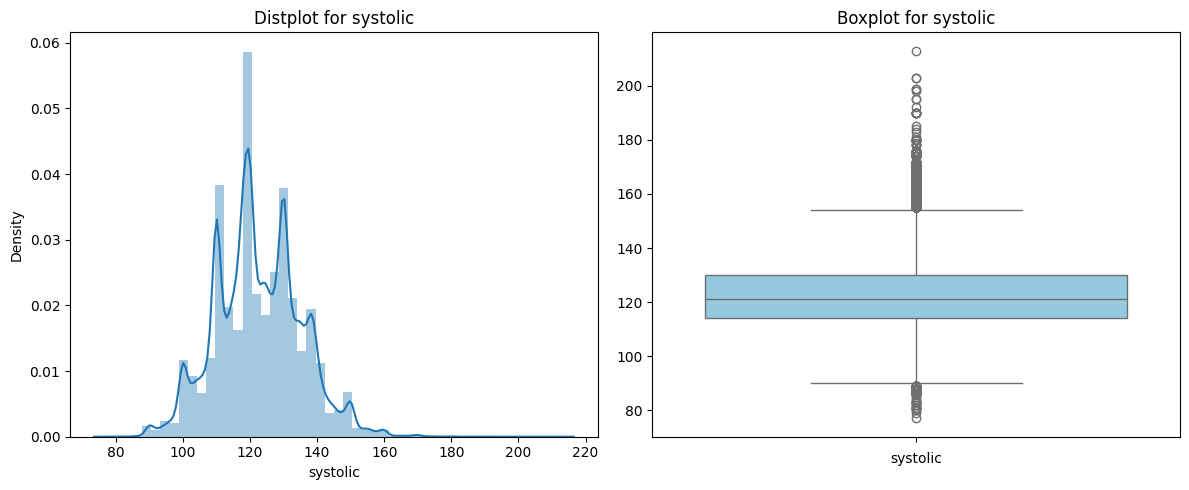

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


for n in numerical:
    # Create a figure with subplots in a 1x2 grid
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Distplot
    sns.distplot(df[n], ax=axs[0])
    axs[0].set_ylabel("Density")
    axs[0].set_xlabel(n)
    axs[0].set_title(f'Distplot for {n}')

    # Boxplot
    sns.boxplot(df[n], ax=axs[1], color='skyblue')
    axs[1].set_ylabel('')
    axs[1].set_xlabel(n)
    axs[1].set_title(f'Boxplot for {n}')
    plt.tight_layout()
    plt.show()

In [58]:
for n in numerical:
    print(f'Skewness of feature {n} is {df[n].skew()}')

Skewness of feature weight(kg) is 0.37807475043098937
Skewness of feature eyesight(left) is 8.890572430701148
Skewness of feature fasting blood sugar is 3.461099039475446
Skewness of feature ALT is 34.8300119320999
Skewness of feature waist(cm) is 0.07244589379014092
Skewness of feature triglyceride is 0.986227749457496
Skewness of feature systolic is 0.21992481204281342


AFTER REMOVING OUTLIER

In [59]:

for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(df[col] >= upper)[0]
    lower_array = np.where(df[col] <= lower)[0]

    # Removing the outliers
    df.drop(index=upper_array, inplace=True, errors='ignore')
    df.drop(index=lower_array, inplace=True,  errors='ignore')





C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


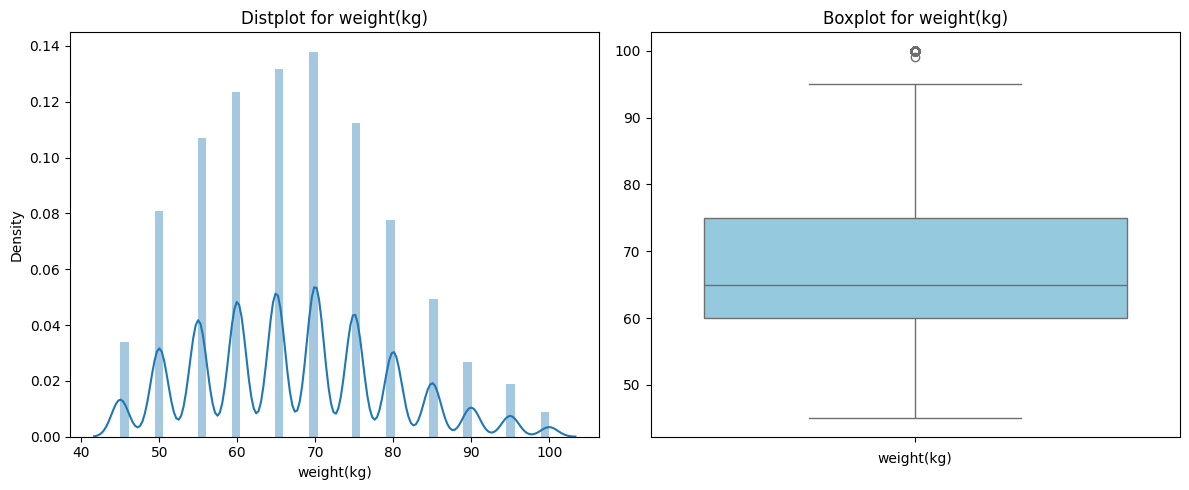

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


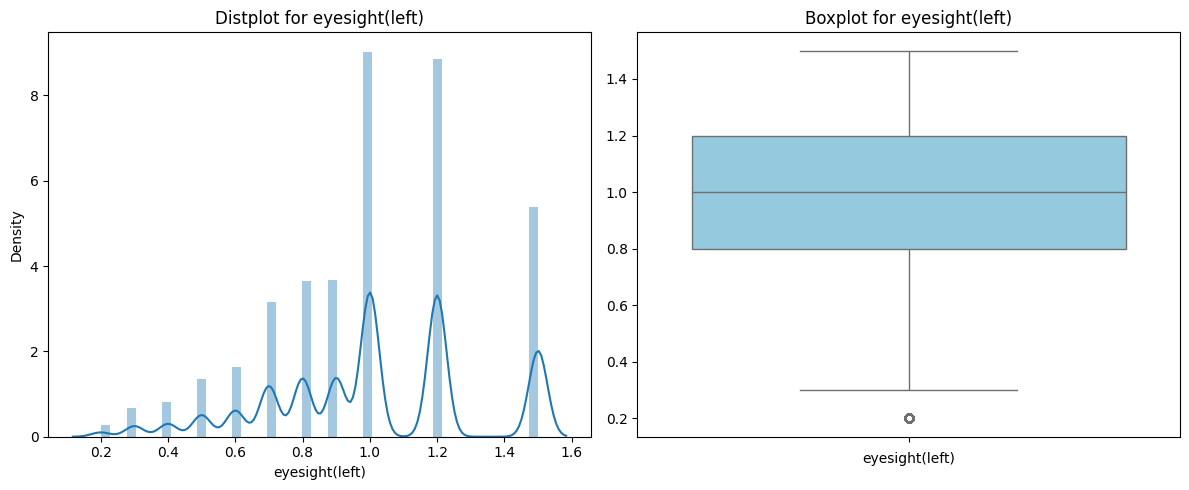

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


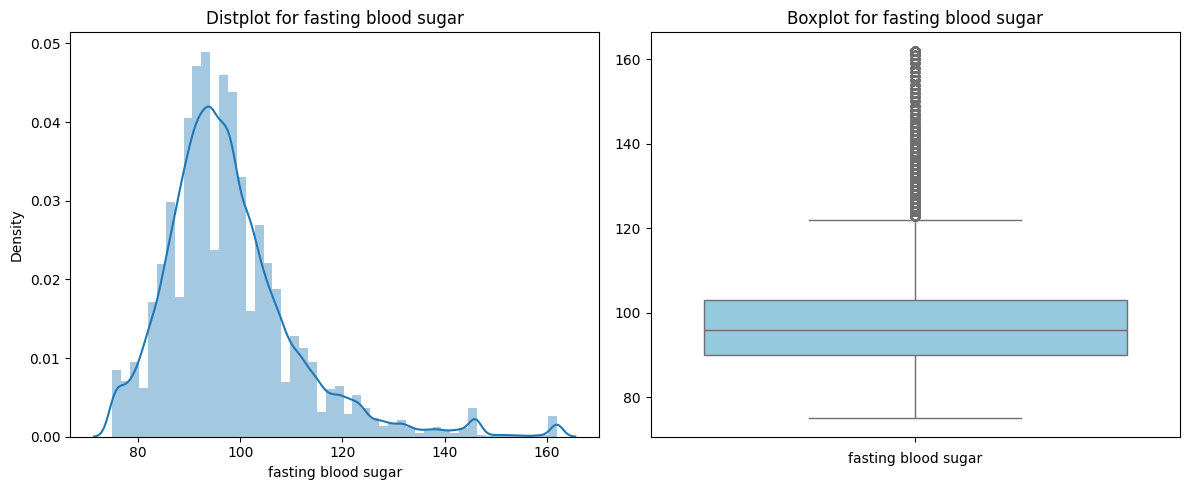

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


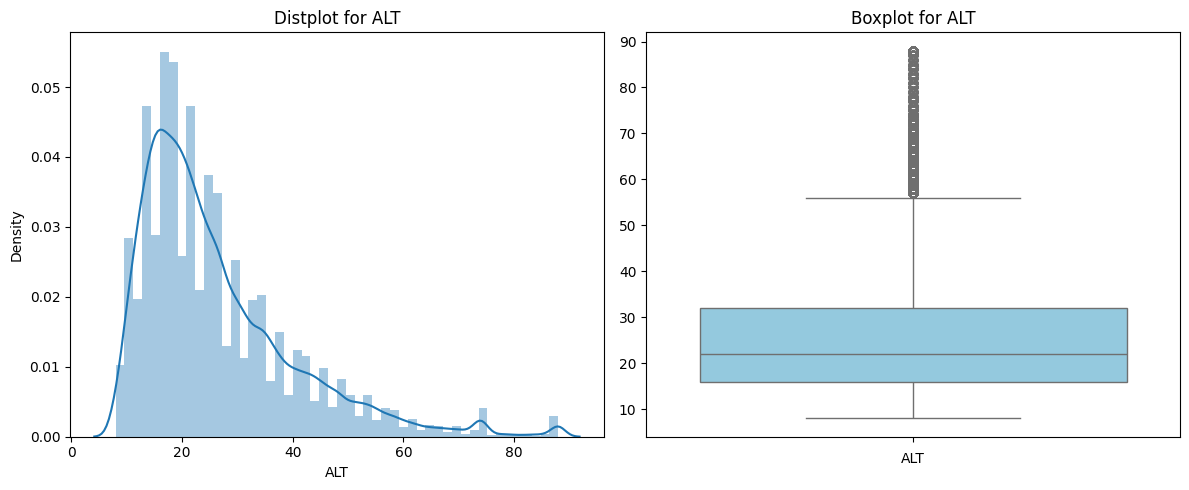

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


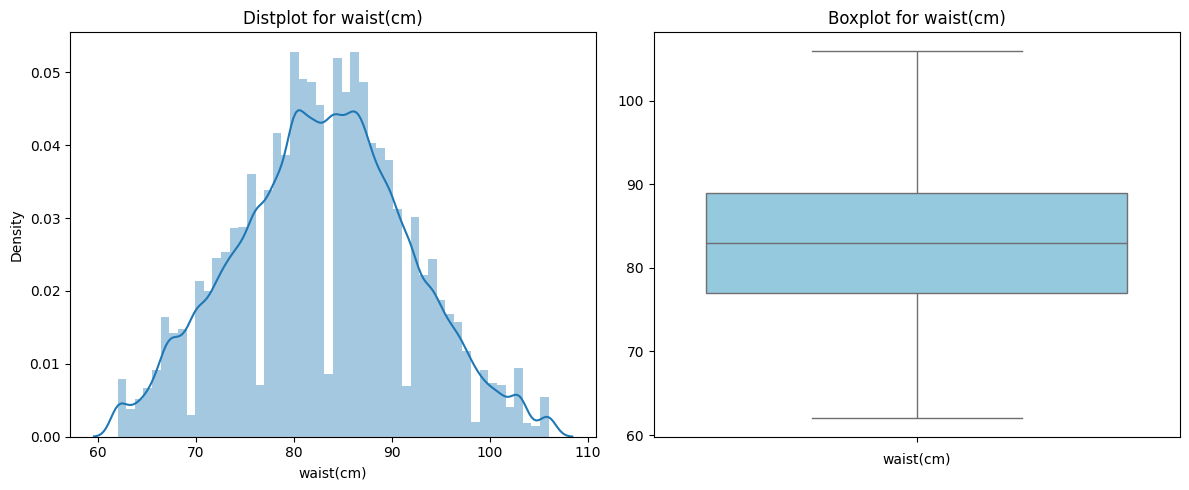

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


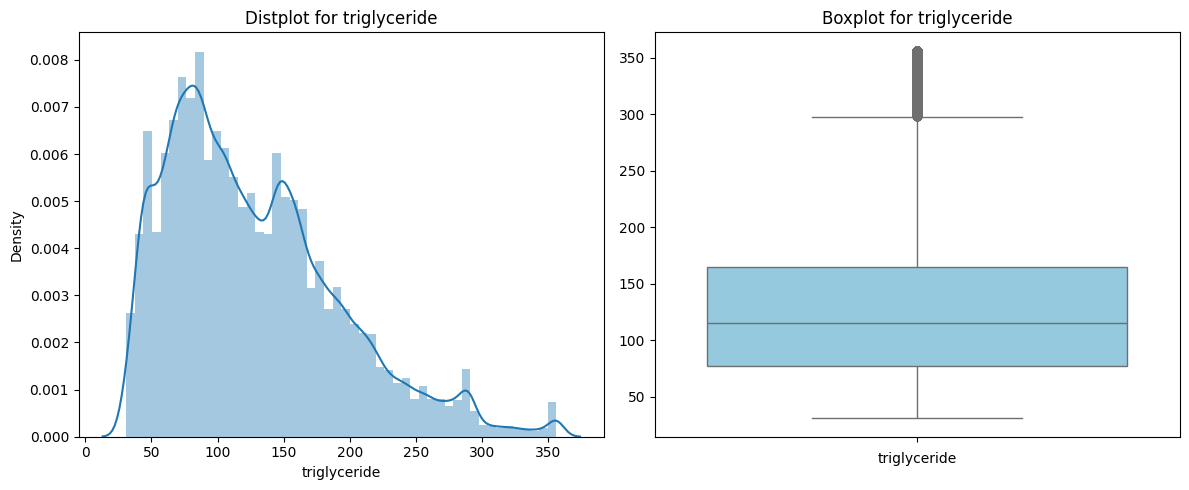

C:\Users\Zedan Net\AppData\Local\Temp\ipykernel_14164\3966904077.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[n], ax=axs[0])


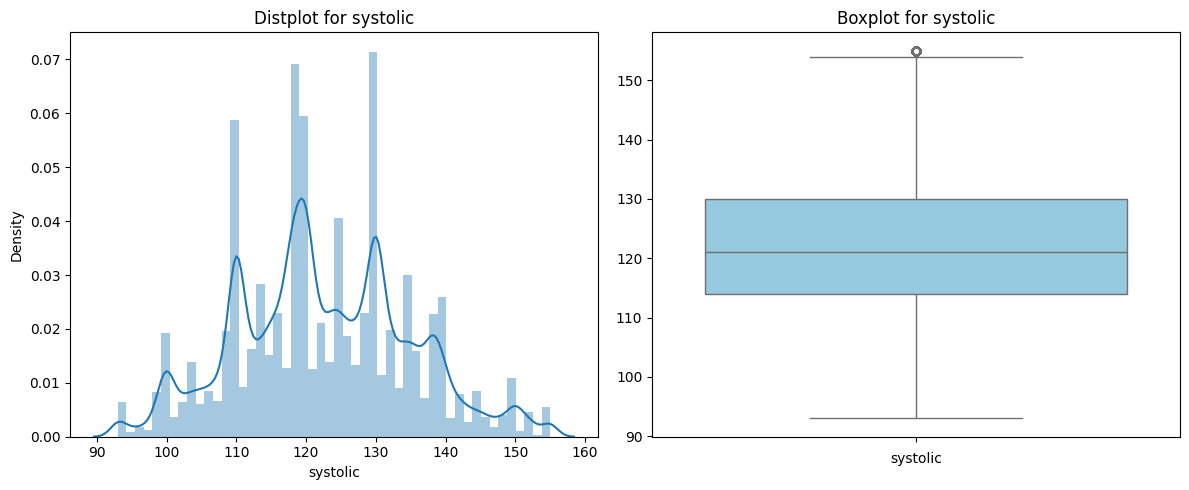

In [79]:
for n in numerical:
    # Create a figure with subplots in a 1x2 grid
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Distplot
    sns.distplot(df[n], ax=axs[0])
    axs[0].set_ylabel("Density")
    axs[0].set_xlabel(n)
    axs[0].set_title(f'Distplot for {n}')

    # Boxplot
    sns.boxplot(df[n], ax=axs[1], color='skyblue')
    axs[1].set_ylabel('')
    axs[1].set_xlabel(n)
    axs[1].set_title(f'Boxplot for {n}')
    plt.tight_layout()
    plt.show()

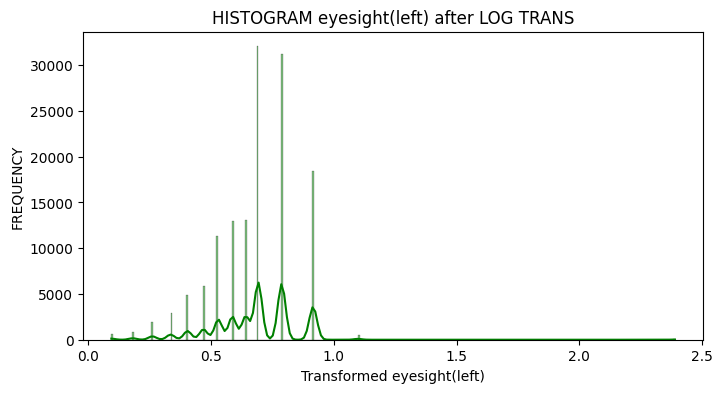

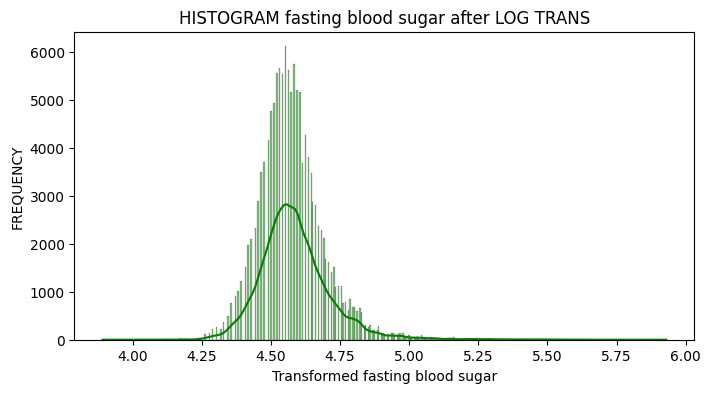

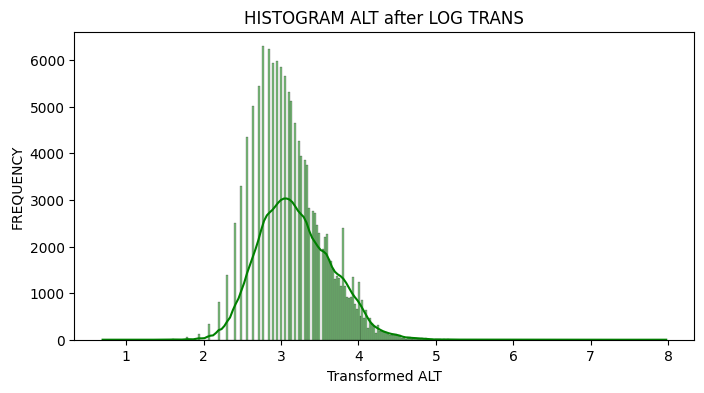

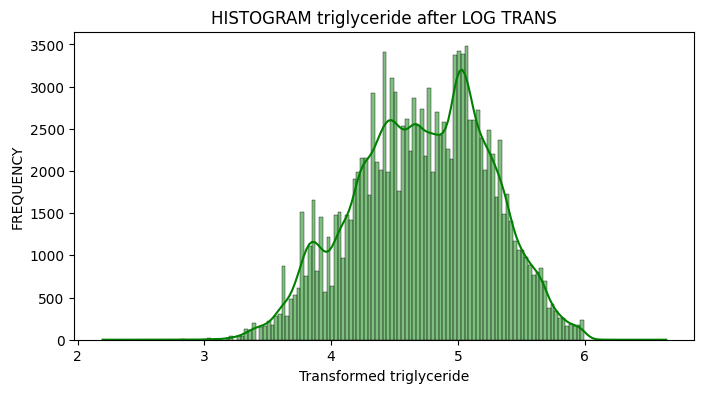

In [60]:
import scipy.stats as stats
skewness = df[numerical].apply(lambda x: stats.skew(x))
skew_threshold = 0.5 
skewed_features = skewness[abs(skewness) > skew_threshold]
for feature in skewed_features.index:
    df[feature] = np.log1p(df[feature])
for feature in skewed_features.index:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature] ,kde= True , color='green' )
    plt.title(f'HISTOGRAM {feature} after LOG TRANS')
    plt.xlabel(f'Transformed {feature}')
    plt.ylabel('FREQUENCY')
    plt.show()

Scaling

We Used Standard Scaler library  
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples

In [ ]:
from sklearn.preprocessing import StandardScaler
data = df
t = df['smoking']
col = data

scaler = StandardScaler()
df_z_scaled = pd.DataFrame(scaler.fit_transform(col), columns=col.columns)
df_z_scaled.reset_index(drop=True, inplace=True)
t.reset_index(drop=True, inplace=True)
df_z_scaled['smoking'] = t
print(df_z_scaled.columns)

Dividing The Scaled Data to 70% training set , 15% validation set , 15% Test Set

In [ ]:
y=df_z_scaled['smoking']
x=df_z_scaled.drop('smoking',axis=1 , inplace=True)
# print(x is None , y is None)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


True False


Correlation Matrix Generated By Autoviz Library

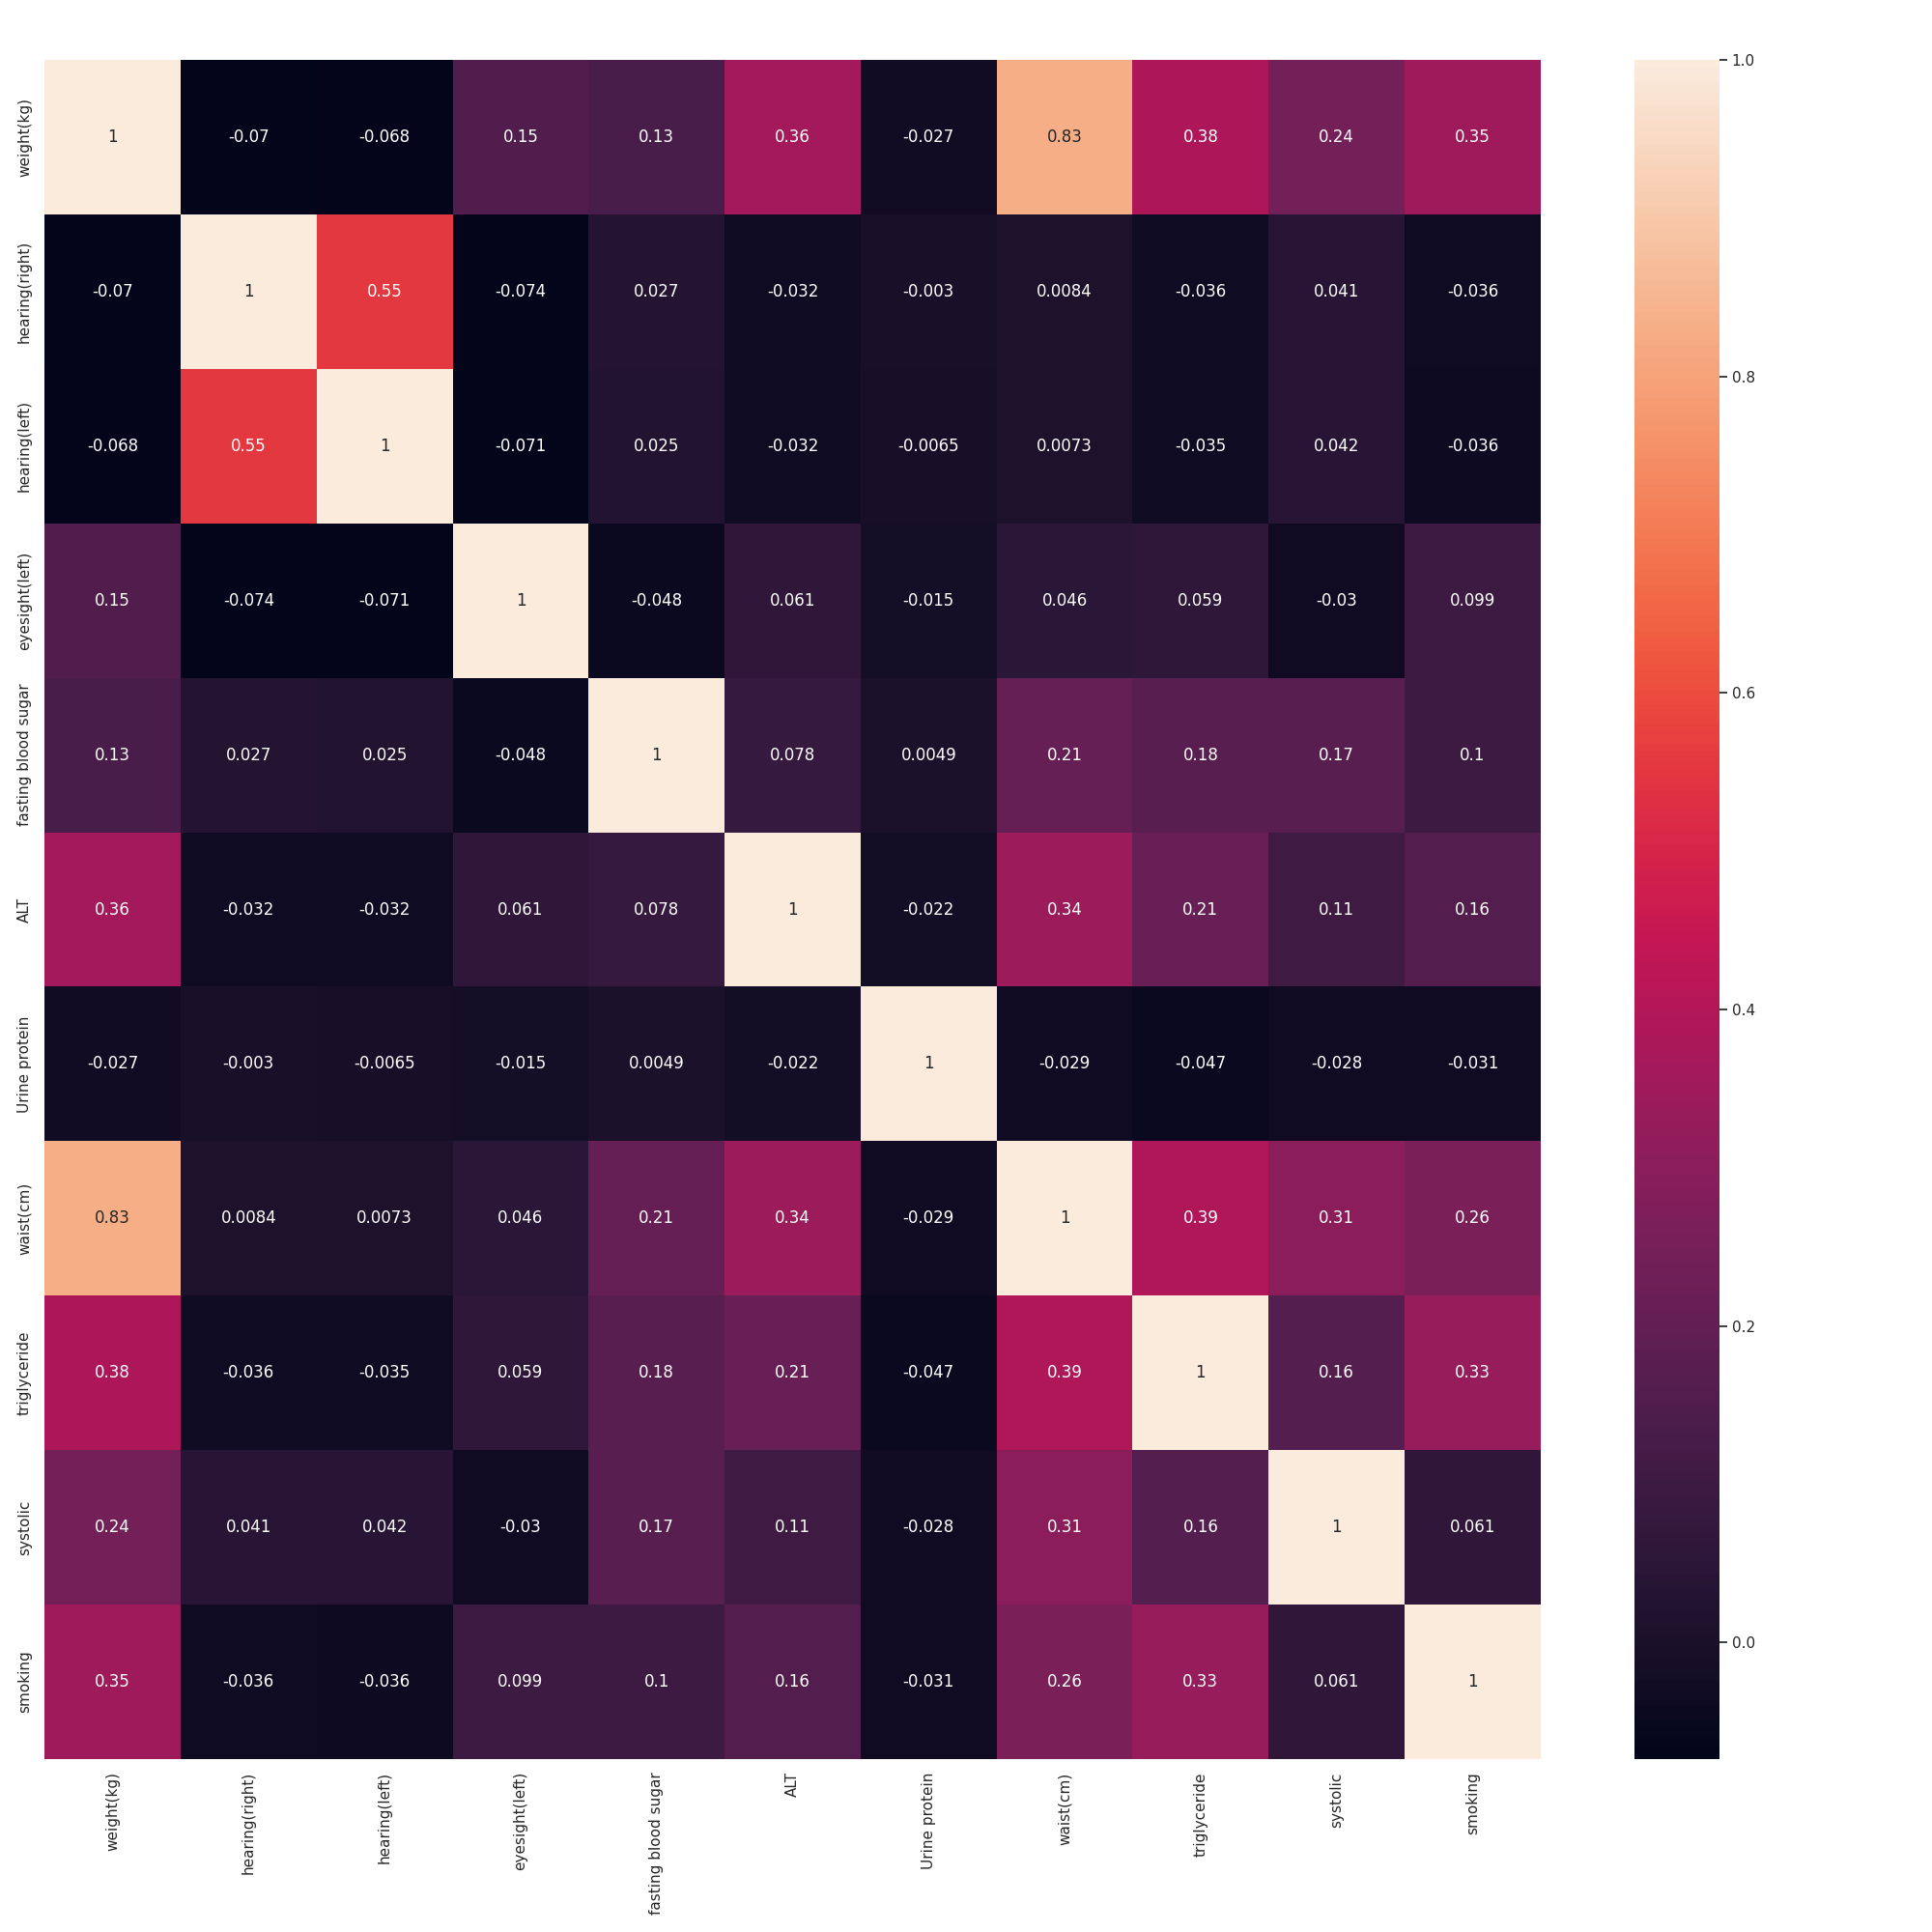